# 201 实现简单线性回归

* 解决回归问题
* 思想简单，实现容易
* 许多强大的非线性模型的基础
* 结果具有很好的可解释性
* 蕴含机器学习中的许多重要思想

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])

[0, 6, 0, 6]

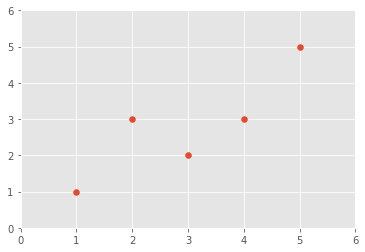

In [3]:
plt.scatter(x, y)
plt.axis([0, 6, 0, 6])

$$ a=\frac{\sum_{i=1}^m \left(x^{(i)}-\bar{x} \right) \left(y^{(i)}-\bar{y}\right)}{\sum_{i=1}^m \left(x^{(i)}-\bar{x}\right)^2} \qquad b=\bar{y}-a\bar{x}$$

In [4]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [5]:
numerator  = 0.0
denominator = 0.0
'''zip([seql, …])接受一系列可迭代对象作为参数，将对象中对应的元素打包成一个个tuple（元组），
然后返回由这些tuples组成的list（列表）若传入参数的长度不等，则返回list的长度和参数中长度最短的对象相同。'''
for x_i, y_i in zip(x,y): 
    numerator += (x_i - x_mean) * (y_i - y_mean)
    denominator += (x_i - x_mean) ** 2

In [6]:
a = numerator / denominator
b = y_mean - a * x_mean

In [7]:
y_hat = a * x + b

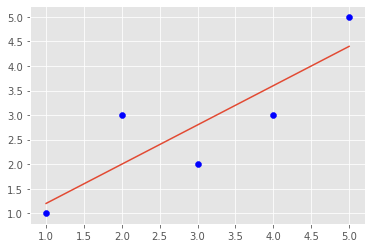

In [8]:
plt.scatter(x, y, color='blue')
plt.plot(x, y_hat)

In [9]:
x_predict = 6
y_predict = a * x_predict + b
y_predict

5.2

### 封装我们自己的SimpleLinearRegression

代码参见 [这里](./code/playML/SimpleLinearRegression.py)

In [10]:
import sys
sys.path.insert(0,'./code')
from playML.SimpleLinearRegression import SimpleLinearRegression1

reg1 = SimpleLinearRegression1()
reg1.fit(x, y)

SimpleLinearRegression1()

In [11]:
reg1.predict(np.array([x_predict]))

array([5.2])

In [12]:
reg1.a_ ,  reg1.b_

(0.8, 0.39999999999999947)

### 向量化实现SimpleLinearRegression

代码参见 [这里](./code/playML/SimpleLinearRegression.py)

In [13]:
import sys
sys.path.insert(0, './code')
from playML.SimpleLinearRegression import SimpleLinearRegression2

reg2 = SimpleLinearRegression2()
reg2.fit(x, y)
reg2.predict(np.array([x_predict]))

array([5.2])

In [14]:
reg2.a_, reg2.b_

(0.8, 0.39999999999999947)

### 向量化实现的性能测试

In [15]:
m = 1000000
big_x = np.random.random(size=m)
big_y = big_x * 2 + 3 + np.random.normal(size=m)
%timeit reg1.fit(big_x, big_y)
%timeit reg2.fit(big_x, big_y)

776 ms ± 23.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
17.4 ms ± 979 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
